In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,classification_report, recall_score, f1_score, confusion_matrix

In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv')
data = pd.read_csv("/content/drive/MyDrive/AI PROJECT/Sleep_health_and_lifestyle_dataset.csv")
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
#dropping duplicates
u_data = data.drop_duplicates()
u_data.shape

(374, 13)

In [ ]:
#not a necessary feature
u_data.drop('Person ID', axis=1, inplace=True)

In [ ]:
u_data.head()


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
#replace NaN with 'No Disease'
u_data['Sleep Disorder'].fillna('No Disease', inplace=True)
u_data['BMI Category'] = u_data['BMI Category'].replace('Normal Weight', 'Normal')

In [ ]:
#extracting input features and output into X and Y respectively
X = u_data.drop('Sleep Disorder',axis=1)
Y = u_data['Sleep Disorder']

In [ ]:
X[['Systolic BP', 'Diastolic BP']] = X['Blood Pressure'].str.split('/', expand=True)

# Dropping the original "Blood pressure" column
X = X.drop('Blood Pressure', axis=1)

In [ ]:
X.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90


In [ ]:
#categories which need to be one hot encoded
categorical_cols = ['Gender', 'Occupation', 'BMI Category']

In [ ]:
#defining onehotencoding preprocessor
preprocessor = ColumnTransformer(
    transformers = [
        ('onehot', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough'
)

In [ ]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [ ]:
Y = np.reshape(Y, (-1, 1))

In [ ]:
#performing onehotencoding on needed input features
X_preprocessed = preprocessor.fit_transform(X)

In [ ]:
print(X_preprocessed[0])

[0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 27 6.1 6
 42 6 77 4200 '126' '83']


In [ ]:
X_preprocessed.dtype

dtype('O')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_preprocessed, Y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000000)
model.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000000, multi_class='multinomial')

In [ ]:
test_score = model.score(x_test, y_test)

In [ ]:
print("Test Accuracy:", test_score)

Test Accuracy: 0.92


In [ ]:
ypred = model.predict(x_test)

In [ ]:
predictions_str = le.inverse_transform(ypred)

In [ ]:
print(predictions_str)

['No Disease' 'No Disease' 'No Disease' 'No Disease' 'No Disease'
 'Insomnia' 'No Disease' 'No Disease' 'No Disease' 'No Disease' 'Insomnia'
 'No Disease' 'No Disease' 'No Disease' 'No Disease' 'Sleep Apnea'
 'No Disease' 'Insomnia' 'No Disease' 'No Disease' 'No Disease'
 'No Disease' 'No Disease' 'Insomnia' 'Insomnia' 'No Disease' 'Insomnia'
 'Insomnia' 'Insomnia' 'Sleep Apnea' 'No Disease' 'No Disease'
 'No Disease' 'Sleep Apnea' 'Sleep Apnea' 'No Disease' 'No Disease'
 'No Disease' 'No Disease' 'No Disease' 'Insomnia' 'Sleep Apnea'
 'Sleep Apnea' 'Insomnia' 'No Disease' 'No Disease' 'No Disease'
 'No Disease' 'Insomnia' 'No Disease' 'Sleep Apnea' 'Sleep Apnea'
 'Sleep Apnea' 'No Disease' 'Insomnia' 'Sleep Apnea' 'Sleep Apnea'
 'Insomnia' 'Sleep Apnea' 'No Disease' 'No Disease' 'Insomnia'
 'No Disease' 'No Disease' 'Insomnia' 'No Disease' 'Insomnia' 'No Disease'
 'No Disease' 'No Disease' 'No Disease' 'Insomnia' 'No Disease'
 'Sleep Apnea' 'Sleep Apnea']


In [ ]:
ypred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 0,
       1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 2])

In [ ]:
accuracy = accuracy_score(y_test, ypred)
print("Testing Accuracy:", accuracy)

# Precision, Recall, F1-score for each class (average='weighted' for multiclass)
precision = precision_score(y_test, ypred, average='weighted')
recall = recall_score(y_test, ypred, average='weighted')
f1 = f1_score(y_test, ypred, average='weighted')
print("Testing Precision:", precision)
print("Testing Recall:", recall)
print("Testing F1-score:", f1)

Testing Accuracy: 0.92
Testing Precision: 0.9210542398777694
Testing Recall: 0.92
Testing F1-score: 0.9194622082897945


In [ ]:
y_train_pred= model.predict(x_train)

In [ ]:
accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", accuracy)

# Precision, Recall, F1-score for each class (average='weighted' for multiclass)
precision = precision_score(y_train, y_train_pred, average='weighted')
recall = recall_score(y_train, y_train_pred, average='weighted')
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("Training Precision:", precision)
print("Training Recall:", recall)
print("Trainig F1-score:", f1)

Training Accuracy: 0.9163879598662207
Training Precision: 0.916811552893169
Training Recall: 0.9163879598662207
Trainig F1-score: 0.9162863620776938


In [ ]:
#table for y_test and y_pred values to show the comparison

import pandas as pd

# Create a DataFrame with y_test and y_pred values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': ypred})

# Display the DataFrame
print(df.to_string())


    Actual  Predicted
0        1          1
1        1          1
2        1          1
3        1          1
4        1          1
5        0          0
6        1          1
7        1          1
8        1          1
9        1          1
10       0          0
11       1          1
12       1          1
13       1          1
14       1          1
15       0          2
16       1          1
17       0          0
18       1          1
19       1          1
20       1          1
21       1          1
22       1          1
23       0          0
24       0          0
25       1          1
26       0          0
27       0          0
28       0          0
29       2          2
30       1          1
31       1          1
32       1          1
33       2          2
34       2          2
35       1          1
36       1          1
37       1          1
38       1          1
39       1          1
40       1          0
41       2          2
42       2          2
43       2          0
44       1

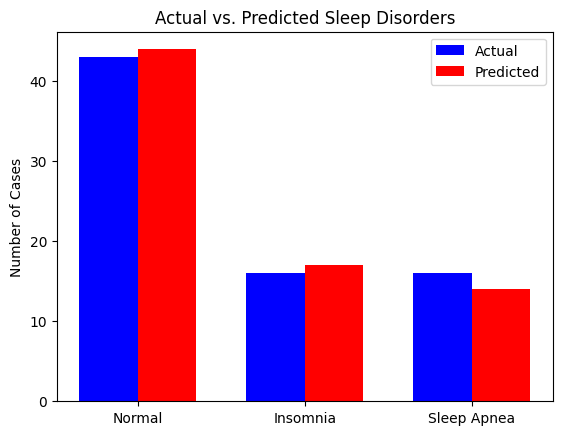

In [ ]:
# prompt: provide a visual graph for this

import matplotlib.pyplot as plt

# Define the labels for the bars
labels = ['Normal', 'Insomnia', 'Sleep Apnea']

# Get the number of occurrences for each sleep disorder in y_test and y_pred
normal_count = len(y_test[y_test == 1])
insomnia_count = len(y_test[y_test == 0])
sleep_apnea_count = len(y_test[y_test == 2])

normal_pred_count=len(ypred[ypred == 1])
insomnia_pred_count=len(ypred[ypred == 0])
sleep_apnea_pred_count=len(ypred[ypred == 2])

# Create the bar chart
x = np.arange(len(labels))  # Positions of the bars
width = 0.35  # Width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [normal_count, insomnia_count, sleep_apnea_count], width, label='Actual', color='blue')
rects2 = ax.bar(x + width/2, [normal_pred_count, insomnia_pred_count, sleep_apnea_pred_count], width, label='Predicted', color='red')

# Add labels, title, and legend
ax.set_ylabel('Number of Cases')
ax.set_title('Actual vs. Predicted Sleep Disorders')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


In [ ]:
weights = model.coef_
print(weights)
weights.shape

[[-1.58053245e-01  1.60196575e-01  8.80341212e-01 -7.81712358e-01
   4.93712411e-01  2.57193599e-01 -4.08627583e-02 -1.03223857e+00
  -5.42071659e-01  9.49002898e-01 -3.92314934e-01 -1.10795060e-03
   2.12201440e-01  2.60076698e-01 -1.35772812e-01 -1.22160558e-01
   5.49954452e-02 -6.12426133e-01 -4.87145182e-01  2.59098496e-02
   2.01374685e-01 -2.22301961e-01 -7.02618372e-04  4.10823319e-01
  -3.56038625e-01]
 [ 3.89564708e-01 -2.44609973e-01 -2.88621576e-01  5.09677157e-01
   2.09397536e-01 -1.75003664e-01  2.73237772e-01  3.05916960e-01
  -2.06726915e-02 -4.07522761e-01  4.02305354e-01  5.11104149e-02
  -7.14869767e-01  1.31177599e-01 -4.22213449e-01  4.35990586e-01
  -1.37098659e-01  3.94123569e-01  1.01180269e+00 -8.90331458e-03
   1.70346586e-01 -1.03751083e-02  4.50826681e-04  2.99059809e-01
  -5.27051009e-01]
 [-2.31511463e-01  8.44133988e-02 -5.91719636e-01  2.72035202e-01
  -7.03109947e-01 -8.21899352e-02 -2.32375014e-01  7.26321610e-01
   5.62744350e-01 -5.41480138e-01 -9.9

(3, 25)